In [1]:
import pandas as pd
import numpy as np

import EDA
import VGS_preprocessing


filename = "vgsales.csv"
df = pd.read_csv(filename)

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



Year:
0.016327268345583804

Publisher:
0.003494396915290999


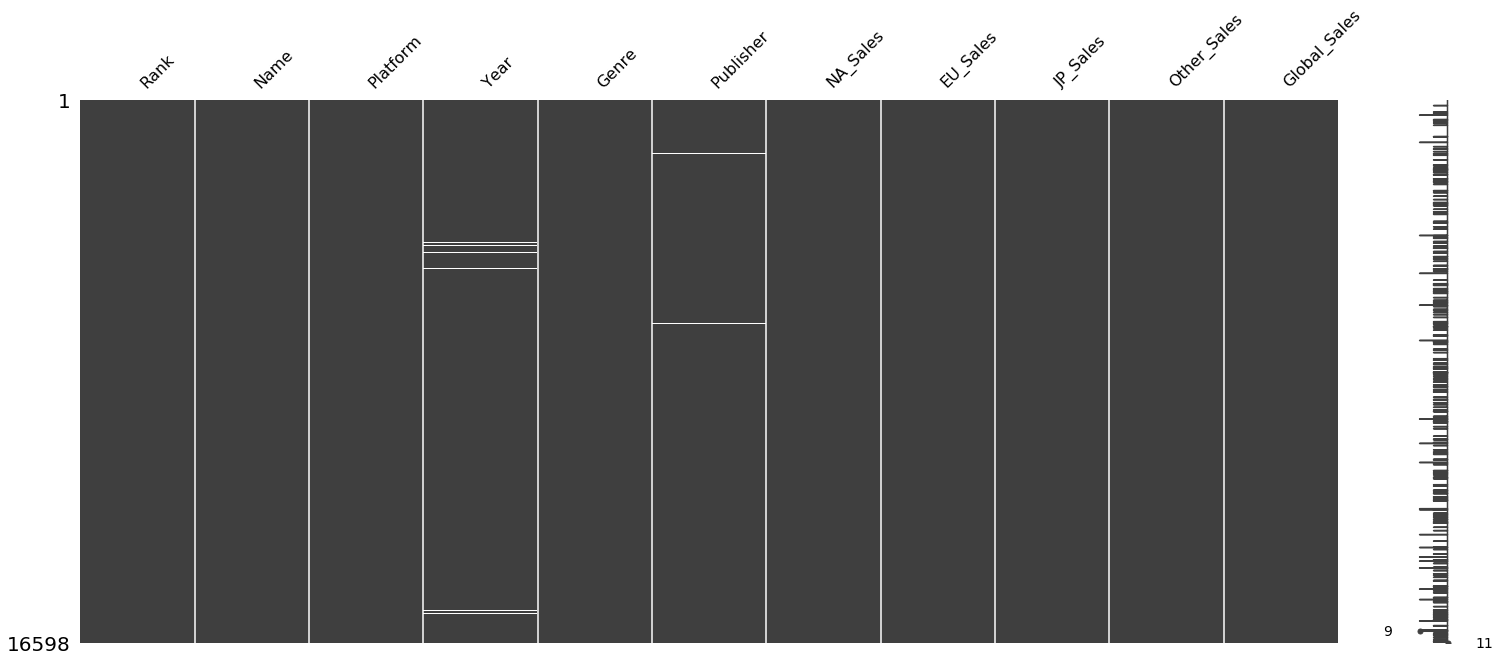

In [3]:
info = EDA.Info(df)
info.missing()

## Replace NaN values in Publisher with "_missing_"

In [4]:
na = VGS_preprocessing.NA(df)
df_na = na.replace('Publisher')
df_na.loc[df.Publisher.isnull()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,_missing_,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,_missing_,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,_missing_,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,_missing_,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,_missing_,0.46,0.17,0.0,0.01,0.64


train accuracy:
0.22882342132663686
cv accuracy:
[0.19585745 0.20079462 0.21065524 0.22215403 0.19494918]


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


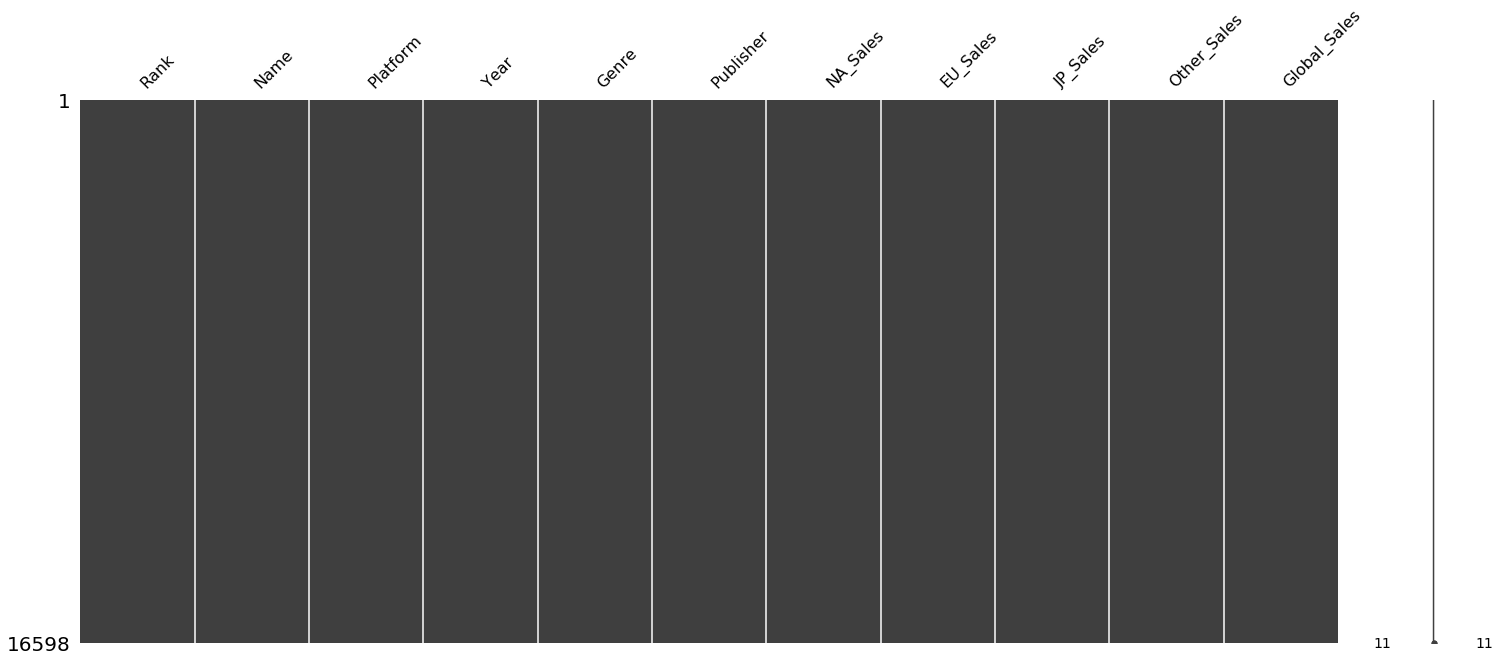

In [8]:
impute = VGS_preprocessing.Impute(df_na)
impute.set_train()
en = VGS_preprocessing.Encode()
en.one_hot(impute.xtr)
impute.xtr = en.encoder.transform(impute.xtr)
impute.ximpute = en.encoder.transform(impute.ximpute)
impute.nb()
impute.impute()
EDA.Info(impute.df_impute).missing()